## ATU -Programming for Data Analysis, Winter 2023/24
## Project 1
##### Author: Norbert Antal

## **Salary_Base_data**

This project aims to create a synthetic dataset of at least 4 different variables that is simulating employee data at a company based on real world data.

### Loading modules

Some essential Python libraries are required for this project; Pandas for data manipulation, Matplotlib and Seaborn for data visualisation and NumPy for numerical operations.

In [202]:
# loading required python modules
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Obtaining data

For sourcing real-world data, Kaggle.com was a valuable resource. Kaggle is a platform *"to learn data science and build a portfolio"*, providing access to large number of diverse datasets relevant to various domains.
The *Salary_Base_data* dataset was chosen as a sample because it covers a domain, employee data, that could prove valuable for examination, especially for those interested in contributing to future projects in the workplace, related to wages, bonus schemes, or other HR related topics.<br>

### Load and check data, initial overview

As we can't control the source file, to avoid possible issues with changing URLs or changes in the contents of the file, the dataset was manually downloaded in .csv format (*Salary_Data.csv*) and copied into the "Datasets" folder within the Projects root folder.

+ The salary dataset is read from the previously downloaded CSV file (*Salary_Data.csv*) into a Pandas DataFrame.<br>
  
+ After checking the datatypes, we find that the dataset contains three float64 or floating point type numeric variables and three object type variables which is indication that the data in those variables are either textual or mixed.<br>
+ For checking the dataframe structure the first 5 rows of the dataframe is displayed which provides more context and appears to be in line with the dataset description provided by the source.
    - Age: Numeric values representing the age of each employee in years.
    - Gender: Categorical values indicating the gender of each employee as either male or female.
    - Education Level: Categorical values reflecting the educational level of each employee.
    - Job Title: Categorical values specifying the job title of each employee.
    - Years of Experience: Numeric values denoting the number of years of work experience for each employee.
    - Salary: Numeric values representing the annual salary of each employee in US dollars, influenced by factors like job title, years of experience, and education level.


>**Errors:** <br> - A small number of entries were missing data. These have been removed as empty cells can potentially give wrong result when data is being analysed. <br>- Additional error handling; while analysing the data with pairs plots, a number of misspelled and redundant/variant category entries were found and subsequently removed or consolidated.



###### Sample dataset: Salary_Base_data.csv (ref: https://www.kaggle.com/datasets/sinhasatwik/salary-base-data/data)<br>Check for NaN in Pandas DataFrame (ref: https://datatofish.com/check-nan-pandas-dataframe/)<br>Pandas - Cleaning Empty Cells (ref: https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp)

In [203]:
# Load data into DataFrame
df=pd.read_csv('Datasets/Salary_Data.csv')

In [204]:
# check data types and sctructure
print("Check Data Types")
print(df.dtypes) # check data types

Check Data Types
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [205]:
print("Check structure")
df.head() # check structure

Check structure


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [206]:
# check for Missing entries
print("Check Errors: missing entries")
print(df.isnull().sum()) # check for Null entries (absence of value)
df[df.isnull().any(axis=1)] # check rows with missing data
# check for missing data (ref:  https://datatofish.com/check-nan-pandas-dataframe/)

Check Errors: missing entries
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [207]:
#remove rows with empty cells
df=df.dropna() # drop rows with missing data # Cleaning empty cells (ref: https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp)
# check result
print("Verify that no missing entries left after removal")
print(df.isnull().sum())

Verify that no missing entries left after removal
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [208]:
# Additional error handling

print("Additional Error handling: Check misspelled and variant category entires in 'Education Level' variable")
df['Education Level'].unique() # verify unique categories in the column in question and found multiple redundant categories
# After checking for unique values in the column, found redundant educational degrees listed with two different writing


Additional Error handling: Check misspelled and variant category entires in 'Education Level' variable


array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [209]:
# Consolidate redundant categories
df["Education Level"] = df["Education Level"].replace(
    ["Bachelor's", "Master's", "phD"], #to replace
    ["Bachelor's Degree", "Master's Degree", "PhD"]) #replaced to

# How to Replace Values in Pandas DataFrame (ref:https://datatofish.com/replace-values-pandas-dataframe/)
# cehck result
print("Verify that category entries are now in order")
df['Education Level'].unique()
# unique values now match the context of the data.

Verify that category entries are now in order


array(["Bachelor's Degree", "Master's Degree", 'PhD', 'High School'],
      dtype=object)

### Analysis of the varaibles

- Age: The dataset includes 6698 individuals with an average age of approximately 33.62 years. Ages range from 21 to 62. The majority of individuals fall between 28 and 38 years old, as indicated by the interquartile range.
- Gender: The dataset has 3 categories in this variable, with 3671 males as most prominent in the total of 6698 entries.
- Education Level: There are seven unique education levels in the dataset. The most common education level is "Bachelor's Degree," occurring 2265 times.
- Job Title: The dataset includes 191 unique job titles. "Software Engineer" is the most frequent job title, appearing 518 times.
- Years of Experience: Employees in the dataset have an average of approximately 8 years of experience. Experience ranges from 0 to 34 years. The majority of individuals have between 3 and 12 years of experience, as indicated by the interquartile range (25-75%).
- Salary: The average salary is approximately 115,000. Salaries range from 350 to 250,000. The interquartile range suggests that most employees earn between 70,000 and 160,000.

These interpretations provide a snapshot of the characteristics and distribution of each variable in the dataset, offering insights into the demographic and employment-related aspects of the individuals represented in the data.



In [210]:
df.describe(include="all") # to include categorical variables https://stackoverflow.com/questions/48997644/how-to-describe-columns-as-categorical-values


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,6698.000000,6698,6698,6698,6698.000000,6698.000000
unique,NaN,3,4,191,NaN,NaN
top,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN
freq,NaN,3671,3021,518,NaN,NaN
mean,33.623022,NaN,NaN,NaN,8.095178,115329.253061
std,7.615784,NaN,NaN,NaN,6.060291,52789.792507
min,21.000000,NaN,NaN,NaN,0.000000,350.000000
25%,28.000000,NaN,NaN,NaN,3.000000,70000.000000
50%,32.000000,NaN,NaN,NaN,7.000000,115000.000000
75%,38.000000,NaN,NaN,NaN,12.000000,160000.000000


### Data Visualisation

According to Edward R. Tufte; *Data graphics visually display measured quantities by means of combined use of points, lines, a coordinate system, numbers, symbols, words, shading, and color.*<br>
Data and information visualization involves creating clear and comprehensible graphic or visual representations of large sets of quantitative and qualitative data. Data visualization is concerned with visually presenting sets of primarily quantitative raw data in a visual format such as tables, charts and graphs,

###### Edward R. Tufte, The Visual Display of Quantitative Information, Graphics Press, 2001 (ref: http://faculty.salisbury.edu/~jtanderson/teaching/cosc311/fa21/files/tufte.pdf) <br> Data and information visualization (ref: https://en.wikipedia.org/wiki/Data_and_information_visualization)

#### Visualizing numeric data from the dataset

A histogram is an approximate representation of the distribution of numerical data. It visualizes how often each different value in a set of data occurs. A histogram is the most commonly used graph to show frequency distributions of continuous data.<br>
Histograms are chosen for numeric data visualization because they reveal distribution shape, central tendency, spread, outliers, and data range in a visual manner. <br>
By visualizing and analysing the data distribution in numeric variables of the dataset we can determine which random distribution model is the most suitable to model the data based on the sample.

###### WHAT IS A HISTOGRAM? (ref: https://asq.org/quality-resources/histogram) <br> Histogram (ref:https://en.wikipedia.org/wiki/Histogram)

In [211]:
df.columns # get column names

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

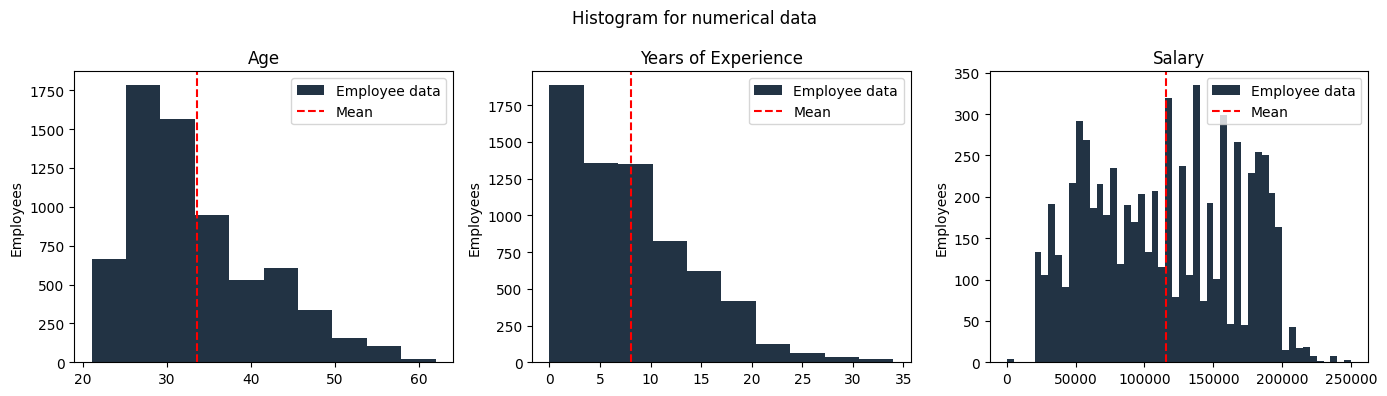

In [212]:
# Histogram for numeric variables
c=['Age', 'Years of Experience', 'Salary'] # set column names
#set up plot for 3 charts
fig, axs = plt.subplots(1,3, figsize=(14,4))
fig.suptitle('Histogram for numerical data',fontsize=12)
#set grid coordinates for subplots
#rows=[0,0,0]
cols=[0,1,2]
b=[10,10,50]
#loop through numeric data and draw histograms + indicate mean
for i in range(len(c)): #loop as many times as the number of elements in the variable 'c' storing column names
    mean = df[c[i]].mean() #get mean 
    # generate subplots and place them on predefined coordinates
    axs[cols[i]].hist(df[c[i]],bins=b[i],label="Employee data", color='#223344')
    axs[cols[i]].set_title(c[i])
    axs[cols[i]].axvline(mean, color="red", ls="--", label="Mean")
    axs[cols[i]].set_ylabel('Employees')  # Set y-axis label
    axs[cols[i]].legend()


plt.tight_layout() #keep the text from overlapping
plt.show()

# Ref get mean (ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)
# Ref matplotlib histograms (ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
# Draw median (ref: https://python-graph-gallery.com/basic-histogram-in-matplotlib/)
# Arranging multiple subplots (ref: https://matplotlib.org/stable/users/explain/axes/arranging_axes.html)

#### Analysis of the histograms of numeric variables

+ **Age:** There is one peak on the graph, indicating that this is an unimodal histogram. With the peak showing left from the mean and most of the data tailing to the right, the histogram is right-skewed and shows clustering close to the lower age groups which in the context of the data means that the younger population is over-represented in the sample. The minimum age is 21, and the majority of individuals are likely in the younger age range.
Based on the shape a Gamma Distribution could be suitable to model the data.

+ **Years of Experience:** For the obvious reasons (Experience accumulates with age.) this histogram is quite similar to the 'Age' histogram discussed above, however it appears much more right-skewed compared with 'Age'. Clustering around lower values indicates that the majority of employees likely have fewer years of experience and there is a significant number of entry-level employees indicated by the peak around the lower end of the graph close to 0 year experience. 
Could use a Gamma distribution however, the shape of the histogram would suggest a Pareto or possibly an exponential distribution model.

+ **Salary:** The histogram is generated with more bins to be able to better see the shape of the data, it appears to be an unimodal histogram, vaguely resembling a bell shape.
A Normal Distribution model may be suitable to model the data.

###### A Complete Guide to Histograms (ref:https://chartio.com/learn/charts/histogram-complete-guide/)<br> Probability Distributions (ref: https://datascienceinpractice.github.io/tutorials/10-Distributions.html)<br> NumPy Random Generator (Ref: https://numpy.org/doc/stable/reference/random/generator.html)

#### Correlation of numeric data

Correlation measures the extent of a linear relationship between two variables. The correlation function (pandas.DataFrame.corr) returns the correlation coefficient (r) which is a numerical measure that measures the strength and direction of a linear relationship between two quantitative variables. The value ranges from -1 to 1 indicating the strength and direction of the relationship, with 0 representing no relationship at all. <br>
To visualize correlation, seaborn's heatmap plot will be utilised, which plots a color-encoded matrix representing the strength of the correlations with darker colour.

###### Correlation (ref: https://www.jmp.com/en_au/statistics-knowledge-portal/what-is-correlation.html) <br> Linear Relationships – Correlation (ref: https://bolt.mph.ufl.edu/6050-6052/unit-1/case-q-q/linear-relationships/)<br> seaborn.heatmap (ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

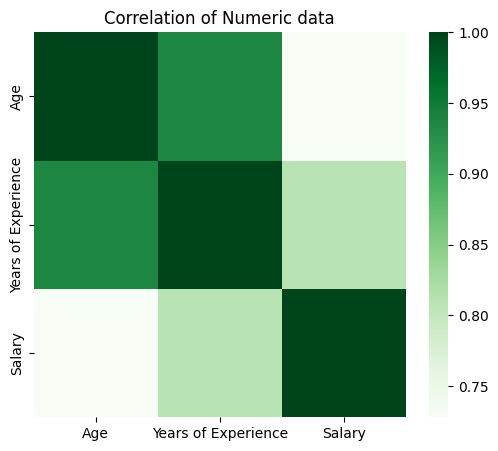

,Age,Years of Experience,Salary
Age,1.000000,0.937725,0.728061
Years of Experience,0.937725,1.000000,0.808968
Salary,0.728061,0.808968,1.000000


In [248]:
# 
plotCorr=df[['Age','Years of Experience','Salary']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(plotCorr, cmap='Greens') # render heatmap (ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html)
plt.title("Correlation of Numeric data")
plt.show()
plotCorr

#### Analysis of correlations

All three numeric variable shows *strong* (0.7-0.9) to near *perfect* (1) positive correlations. <br>The relatively weakest correlation is between Age and Salary (0.73), while the strongest and nearly perfect correlation is unsurprisingly between Years of Experience and Age (0.94). <br>Apparently the salary amount is slightly more determined by Years of Experience (0.81) than Age (0.73).

###### User's guide to correlation coefficients (ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/) <br> Dancey and Reidy's (2004) correlation categorization. (ref:https://www.researchgate.net/figure/Dancey-and-Reidys-2004-correlation-categorization_tbl5_338938434)

#### Visualizing categorical data from the dataset

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. A bar graph shows comparisons among discrete categories.

###### Bar Chart (ref: https://en.wikipedia.org/wiki/Bar_chart)

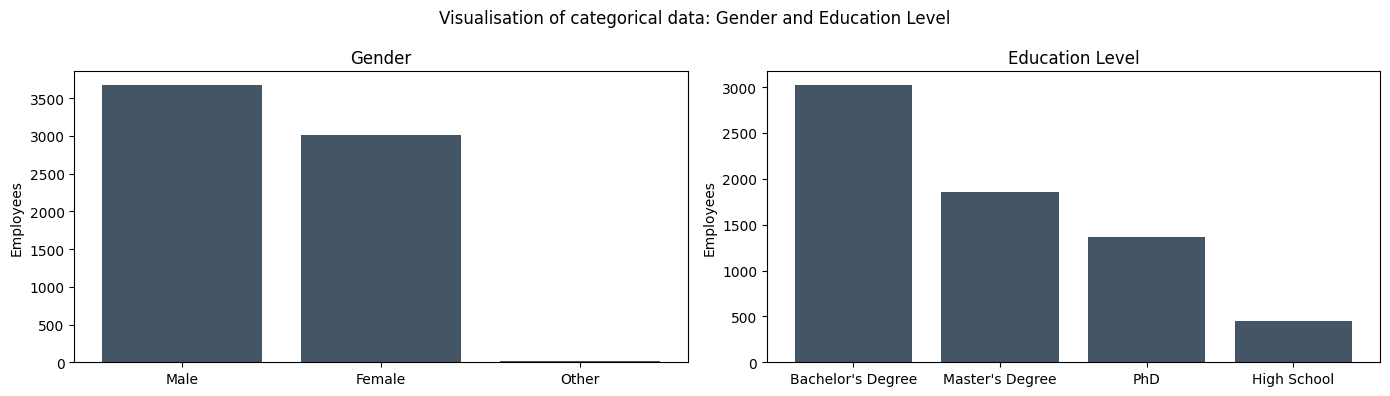

In [213]:
# Bar plots for categorical variables
c=['Gender', 'Education Level', 'Job Title'] # set column names
#set up plot for 3 charts
fig, axs = plt.subplots(1,2, figsize=(14,4))
fig.suptitle('Visualisation of categorical data: Gender and Education Level',fontsize=12)
#set grid coordinates for subplots
cols=[0,1]
#loop through data and draw histograms
for i in range(2):
    # generate subplots and place them on predefined coordinates
    axs[cols[i]].bar(df[c[i]].value_counts().index, df[c[i]].value_counts(), color='#445566')
    axs[cols[i]].set_title(c[i])
    axs[cols[i]].set_ylabel('Employees')  # Set y-axis label

plt.tight_layout() #keep the text from overlapping
plt.show()

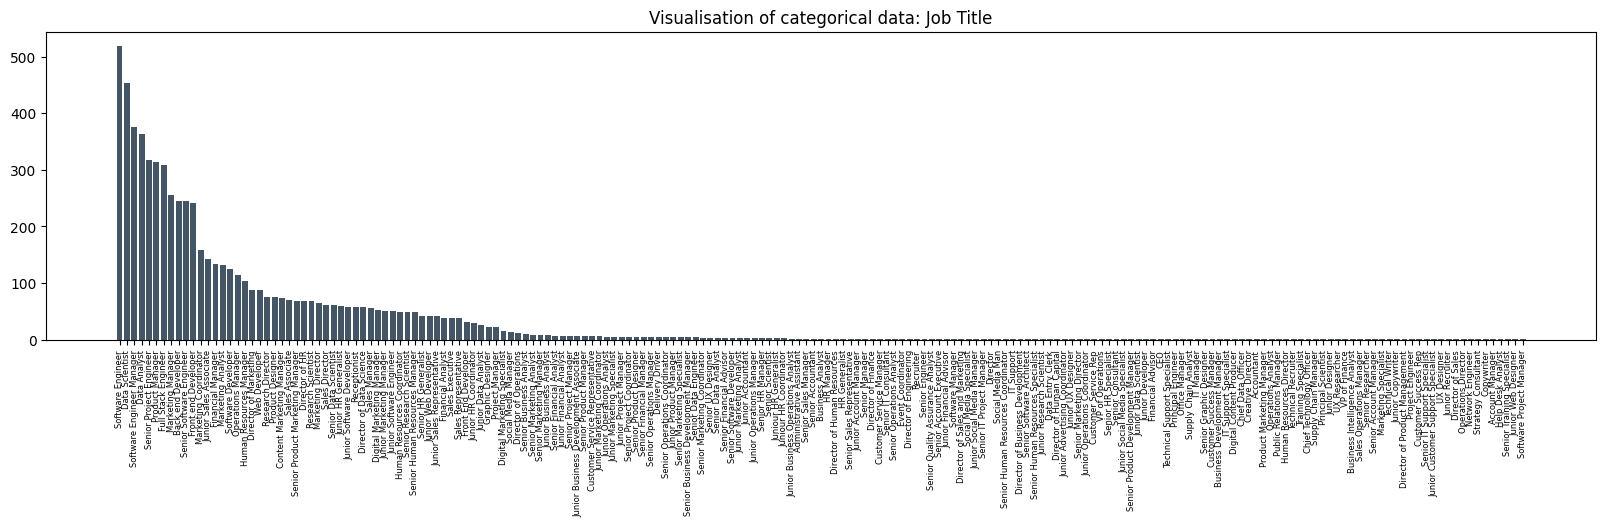

In [214]:
# generating separate plot for Job Title due to the large number of categories.
fig, axs = plt.subplots(figsize=(20,4))
plotme=df['Job Title']
plt.bar(plotme.value_counts().index, plotme.value_counts(), color='#445566')
plt.xticks(rotation=90, fontsize=6) # rotate axis labels (ref: https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels)
plt.title('Visualisation of categorical data: Job Title',fontsize=12)
plt.show()

### Analysis of the bar charts of categorical data

+ **Gender:** The bar chart shows three categories, with the "Male" category being the most prominent. With only Male and Female categories a Bernoulli distribution would be sufficient but with the third category present, a binominal distribution will be required to model this data.

+ **Education Level:** There are four categories with 'Bachelor's Degree' the highest and 'High School' the lowest. Binominal distribution could be the most likely model for this variable.

+ **Job Title:** This variable has 191 distinct categories, some of them self-explanatory but many of them are difficult to interpret without detailed knowledge about the company's specific roles. For these reasons this variable is not likely to help with a deeper understanding of the relationships with other variables in the data. Therefore, 'Job Title' variable will be excluded from further analysis.  


###### (ref:https://www.unf.edu/~cwinton/html/cop4300/s09/class.notes/DiscreteDist.pdf)

### Investigating relationships between variables

The Pairplot enables the analysis of pairwise relationships between variables within a dataset, offering a visual summary of a large amount of data within a single figure. This is particularly helpful during the initial exploration of a dataset.
<br>
Seaborn's Pairplot, part of the Python Seaborn library, is used to create a grid of scatter plots and histograms, visualizing the pairwise relationships in a dataset. The comparison is made easier by having all pairs of measurements plotted side by side using subplots. Where the same measurement paired, a histogram is drawn. <br>

A scatter plot, which is the default visualization in Seaborn's pairplots, uses dots to represent values of two numeric variables, with each dot indicating the values of an individual data point on the horizontal and vertical axis. It is used to visualize relationships between variables.<br>

From the previous Correlation Analysis, we already established that the Salary amount is strongly affected by Years of Experience (0.81) and Age (0.73). Seaborn's pairplot allows for a similar comparison, but it also can provide context using a categorical variable such as 'Gender' or 'Education Level' with the hue function that colours the data according to the category values, providing further insight.

###### Seaborn Pairplot: Enhance Your Data Understanding with a Single Plot (ref: https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22) <br> seaborn.pairplot (ref: https://seaborn.pydata.org/generated/seaborn.pairplot.html) <br> A Complete Guide to Scatter Plots (ref: https://chartio.com/learn/charts/what-is-a-scatter-plot/)

<Figure size 1600x1000 with 0 Axes>

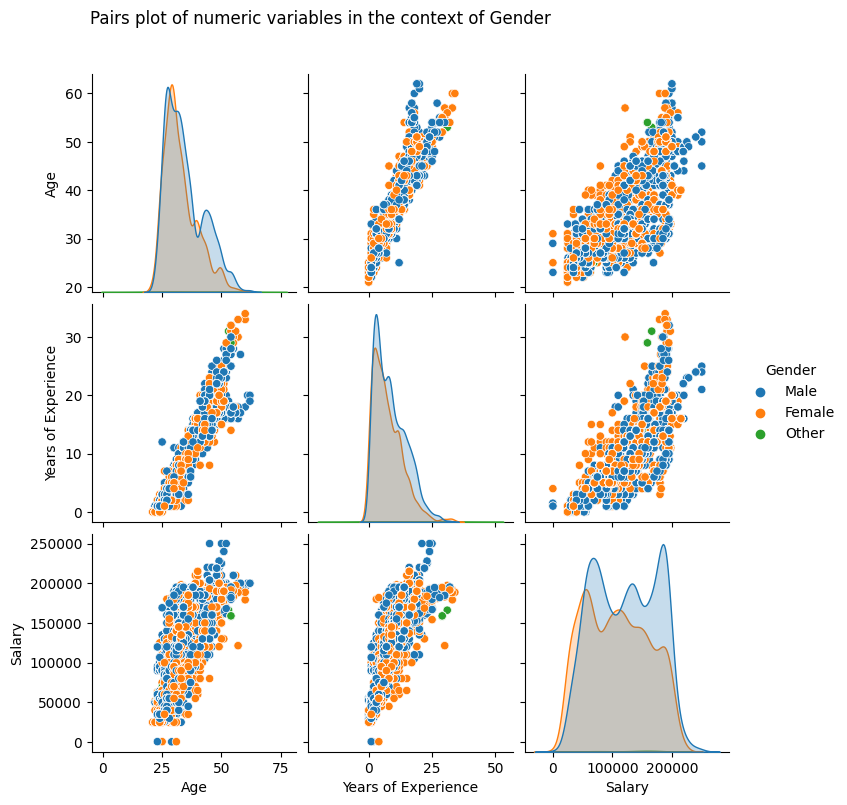

In [252]:
# Examine the data in the context of Gender
# Draw pairplots in with 'Gender' categories distinguished with colour.
context='Gender'
sns.pairplot(df, hue=context, height=2.5)
plt.title(f"Pairs plot of numeric variables in the context of {context}", x=-1,y=3.3)
plt.show()

#### Analysis of pairplots in the context of the 'Gender' category

1. **Age:** 
    - a) Age on Age comparison in the context of Gender provides us with a histogram of the distribution of the Genders. It was already discussed in the previous Age histogram that most of the employees are in their twenties and thirties. It appears that the genders are evenly distributed in the more populous demographic however, as the age closing to the 50 mark, the number of male employees are visibly higher. Furthermore, it also reveals that the difference in the total number of male and female employees demonstrated in the bar charts previously is mainly due to the higher number of middle-aged men on the payroll.
    - b)  The scatter plot of Age vs Years of Experience clearly shows the previously discussed positive linear relationship between the two variables, but it also reveals that the older female employees have more Years of Experience compared with their male counterparts.
    - c)  On Age vs Salary the scatter plot shows signs of wage disparity with male employees getting the highest salaries regardless of their age the with an apparent glass ceiling for women at around 200k annual salary.
2. **Years of Experience:** 
    - a) Years of experience vs Age confirms the already discussed points in section 1.a) above
    - b) Years on Experience plotted on itself shows that there are more male employees than female which is already established, and that the male employees in general have a little more Years of Experience. This could be explained with the previously noted discrepancy in employee demographic (higher number of older male employees) and the strong correlation between Age and Years of Experience.
    - c) Years of Experience vs Salary reveals that while the most experienced employees are female, the highest salaries are paid to male employees. The result is counterintuitive since the highest positive correlation has been already demonstrated between Salary and Years of Experience. This phenomenon can't be explained without analysing the data in other context as well such as Education Level or Job Title.
+ **Salary:** 
    - a) Both Salary vs Age and Salary vs Years of Experience shows the previously discussed positive linear relationships but also reveals the high earning male employees clearly separated from the trend.
    - b) Salary on Salary confirms the higher number of male employees compared with female as expected, however it also reveals that the female employees start with a slightly lower salary, there is a moderate peak at the medium salary value and continue to be represented less and less at the higher salary ranges. Meanwhile, the number of male employees peak at a higher entry-level salary, peak once more in around the middle (but higher than the female employees) and peak highest at the highest salary range.

The results strongly indicate a difference between the salaries of male and female employees that is against the previously demonstrated positive linear correlations between variables affecting the salary. <br>
The 'gender pay gap' is a globally recognized phenomenon that refers to the average difference in remuneration between men and women in the workforce. It is influenced by various factors, including occupational segregation, differences in education and experience, and societal factors. However, it must be noted that without the context of other variables such as 'Education Level', there is insufficient evidence to make the connection.

###### Gender pay gap (ref: https://en.wikipedia.org/wiki/Gender_pay_gap)

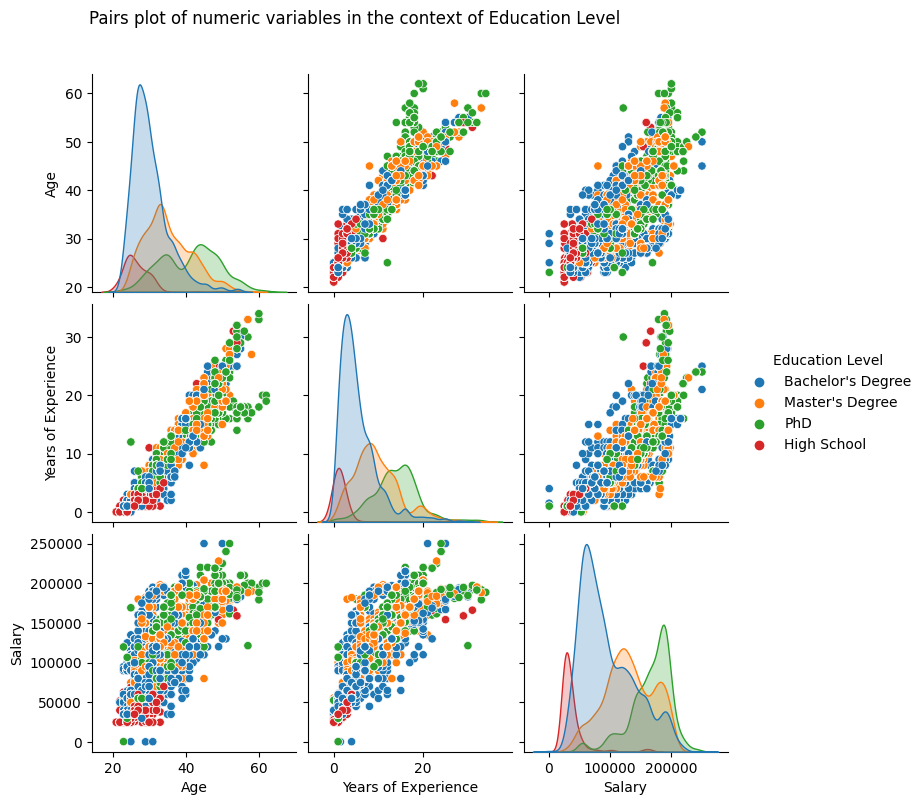

In [217]:
context='Education Level'
sns.pairplot(df, hue=context, height=2.5)
plt.title(f"Pairs plot of numeric variables in the context of {context}", x=-0.83,y=3.3)
plt.show()

#### Analysis of pairplots in the context of the 'Education Level' category

1. **Age:** 
    - a) 
    - b) 
    - c) 
2. **Years of Experience:** 
    - a) 
    - b) with the previously noted discrepancy in employee demographic (higher number of older male employees) and the strong correlation between Age and Years of Experience.
    - c) Years of Experience vs Salary reveals that while the most experienced employees are female, the highest salaries are paid to male employees. The result is counterintuitive since the highest positive correlation has been already demonstrated between Salary and Years of Experience. This phenomenon can't be explained without analysing the data in other context as well such as Education Level or Job Title.
+ **Salary:** 
    - a) Both Salary vs Age and Salary vs Years of Experience shows the previously discussed positive linear relationships but also reveals the high earning male employees clearly separated from the trend.
    - b) Salary on Salary confirms the higher number of male employees compared with female as expected, however it also reveals that the female employees start with a slightly lower salary, there is a moderate peak at the medium salary value and continue to be represented less and less at the higher salary ranges. Meanwhile, the number of male employees peak at a higher entry-level salary, peak once more in around the middle (but higher than the female employees) and peak highest at the highest salary range.

The results strongly indicate a difference between the salaries of male and female employees that is against the previously demonstrated positive linear correlations between variables affecting the salary. <br>
The 'gender pay gap' is a globally recognized phenomenon that refers to the average difference in remuneration between men and women in the workforce. It is influenced by various factors, including occupational segregation, differences in education and experience, and societal factors. However, it must be noted that without the context of other variables such as 'Education Level', there is insufficient evidence to make the connection.

###### Gender pay gap (ref: https://en.wikipedia.org/wiki/Gender_pay_gap)

fit random distributions to data

ref: https://datascienceinpractice.github.io/tutorials/10-Distributions.html<br>
Gamma https://medium.com/geekculture/fitting-time-to-event-to-a-gamma-distribution-model-using-python-1c76cbc7a6a#:~:text=Fit%20Data%20to%20Gamma,observations%20given%20the%20gamma%20distribution.



<Axes: xlabel='Gender', ylabel='Salary'>

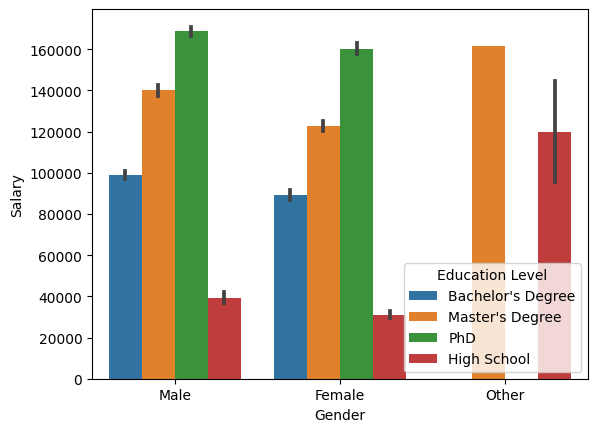

In [257]:
sns.barplot(data=df, x="Gender", y="Salary", hue="Education Level")

<Axes: xlabel='Gender', ylabel='Salary'>

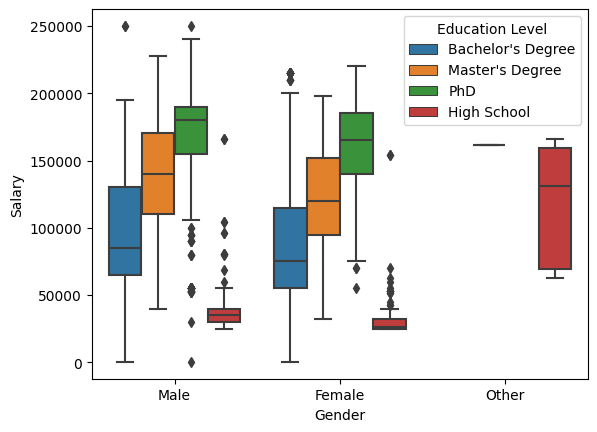

In [258]:
sns.boxplot(data=df, x="Gender", y="Salary", hue="Education Level")

### Creating synthetic data for the Age variable using random distribution model

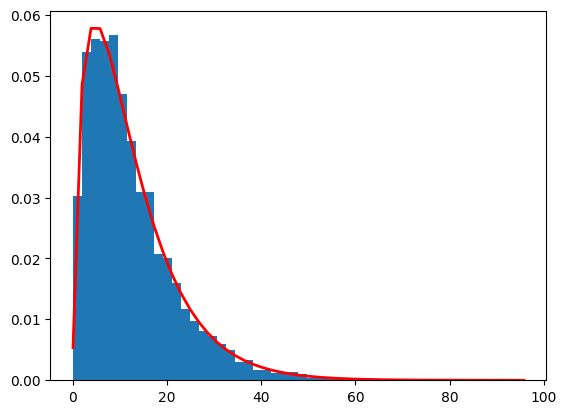

In [218]:
# age with gamma distribution 
shape, scale = df['Age'].mean()-32, df['Age'].std()  # - dirty gamma: distorted mean by -30 to fit original distribution
s = np.random.gamma(shape, scale, df['Age'].count())
#Display the histogram of the samples, along with the probability density function:

import matplotlib.pyplot as plt
import scipy.special as sps  # for drawing the curve (as per Numpy documentation)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
#NumPy.randmom.gamma (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)

(array([3.241e+03, 2.164e+03, 8.420e+02, 3.150e+02, 9.200e+01, 2.700e+01,
        1.200e+01, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([ 21.03800405,  30.61248873,  40.18697341,  49.76145809,
         59.33594277,  68.91042745,  78.48491213,  88.05939681,
         97.63388149, 107.20836617, 116.78285085]),
 <BarContainer object of 10 artists>)

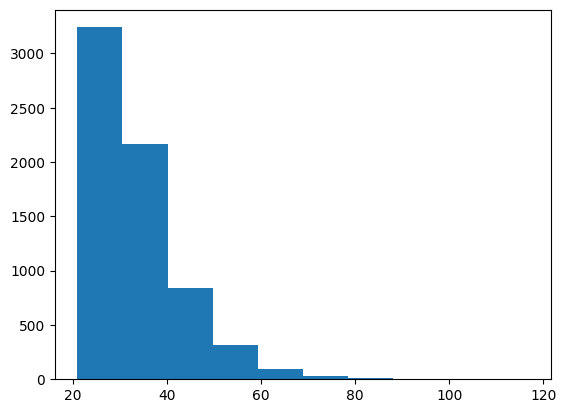

In [219]:
x=21+s
plt.hist(x) # some hits are generated over the pension age (66), this can be avoided by generating more data than the df.max and cutting off those that are over 66 - will try

(array([  10.,   89.,  392., 1086., 1608., 1766., 1147.,  471.,  112.,
          17.]),
 array([-70790.32997815, -34087.66585546,   2614.99826722,  39317.66238991,
         76020.3265126 , 112722.99063529, 149425.65475798, 186128.31888066,
        222830.98300335, 259533.64712604, 296236.31124873]),
 <BarContainer object of 10 artists>)

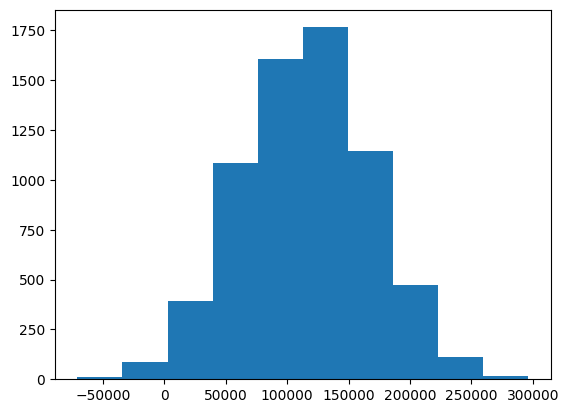

In [220]:
# salary with normal distribution
# Number of samples
samples = df['Salary'].count()
# Generate random samples from a normal distribution
mu, sigma = df['Salary'].mean(), df['Salary'].std()
rng = np.random.normal(mu, sigma, samples)
plt.hist(rng)

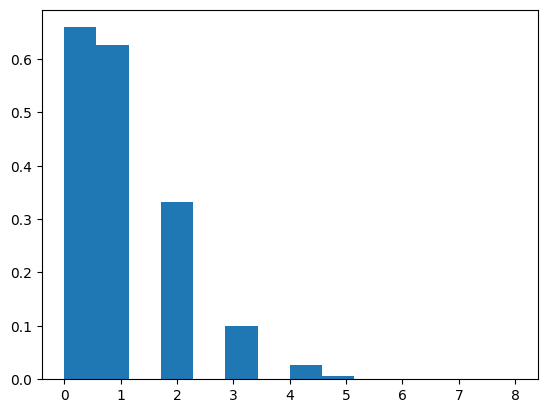

In [221]:
#plt.hist(df['Education Level'])
# Poisson for Education Level
s = np.random.poisson(1, 7000)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

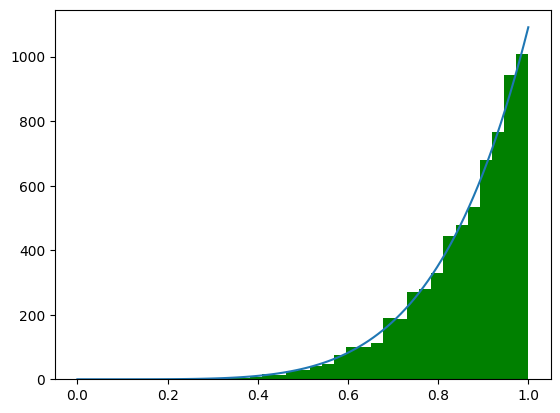

In [222]:
# Power distribution: https://numpy.org/doc/stable/reference/random/generated/numpy.random.power.html

a = df['Years of Experience'].std() # shape
samples = df['Years of Experience'].count()
s = np.random.power(a, samples)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, bins=30,color="g")
x = np.linspace(0, 1, 100)
y = a*x**(a-1.)
normed_y = samples*np.diff(bins)[0]*y
plt.plot(x, normed_y)
plt.show()

In [223]:
# Binominal distribution
# ref: # https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

#12 months, 80% chance
n, p = 12, 0.68   # n= number of trials/experiments/coins(1),
                # p= probability of each trial (50%)
rand_coins = np.random.binomial(n, p, df['Month'].count())
# coinflipping x100
# create bar plot 
fig, ax = plt.subplots(figsize=(12,4))
#count unique values in the array:
x, counts = np.unique(rand_coins, return_counts=True)
#Create bar chart
#ax.bar(x, counts)
#print(rand_coins)
plt.hist(rand_coins,bins=12)
rand_coins

KeyError: 'Month'

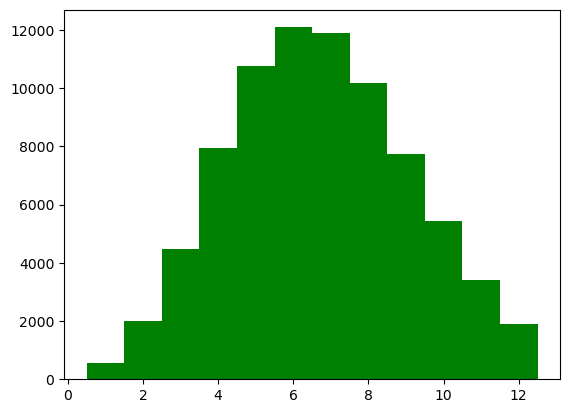

array([11, 10,  7, ...,  5,  4, 10])

In [ ]:
# model Months with Poisson ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html

# Number of samples
samples = df['Month'].count()

# Poisson distribution
lam = df['Month'].mean()  # lambda = Mean
rng = np.random.poisson(lam, samples) 

randMonths=rng

# plot
randMonths = np.sort(randMonths)
plt.hist(randMonths, bins=np.arange(1, 14) - 0.5, color='g')  
plt.show()
rng

#how to get poisson to chose lower months more often??